In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import set_config

In [3]:
df=pd.read_csv("mental-health.csv")
df
df.loc[:,["sleephoursimputed"]]=df["sleep_hours"]
df.loc[:,["screentimeimputedinhours"]]=df["screen_time_hours"]
df.loc[:,["physicalactmins"]]=df["physical_activity_mins"]
df.loc[:,["moodscore"]]=df["mood_score"]

In [4]:
x=df.drop(columns=["stress_level"])
y=df[["stress_level"]]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [5]:
xtrain.loc[xtrain["sleephoursimputed"].isnull(), "sleephoursimputed"] = (
    xtrain["sleep_hours"]
    .dropna()
    .sample(xtrain["sleephoursimputed"].isnull().sum(), random_state=42, replace=True)
    .values  # 👉 Ensures proper alignment
)

# If xtest is defined
xtest.loc[xtest["sleephoursimputed"].isnull(), "sleephoursimputed"] = (
    xtest["sleep_hours"]
    .dropna()
    .sample(xtest["sleephoursimputed"].isnull().sum(), random_state=42, replace=True)
    .values
)



In [6]:
xtrain.loc[xtrain["screentimeimputedinhours"].isnull(), "screentimeimputedinhours"] = (
    xtrain["screen_time_hours"]
    .dropna()
    .sample(xtrain["screentimeimputedinhours"].isnull().sum(), random_state=42, replace=True)
    .values  # 👉 Ensures proper alignment
)

# If xtest is defined
xtest.loc[xtest["screentimeimputedinhours"].isnull(), "screentimeimputedinhours"] = (
    xtest["screen_time_hours"]
    .dropna()
    .sample(xtest["screentimeimputedinhours"].isnull().sum(), random_state=42, replace=True)
    .values
)


In [14]:
xtrain.loc[xtrain["physicalactmins"].isnull(), "physicalactmins"] = (
    xtrain["physical_activity_mins"]
    .dropna()
    .sample(xtrain["physicalactmins"].isnull().sum(), random_state=42, replace=True)
    .values  # 👉 Ensures proper alignment
)

# If xtest is defined
xtest.loc[xtest["physicalactmins"].isnull(), "physicalactmins"] = (
    xtest["physical_activity_mins"]
    .dropna()
    .sample(xtest["physicalactmins"].isnull().sum(), random_state=42, replace=True)
    .values
)


In [15]:
xtrain.loc[xtrain["moodscore"].isnull(), "moodscore"] = (
    xtrain["mood_score"]
    .dropna()
    .sample(xtrain["moodscore"].isnull().sum(), random_state=42, replace=True)
    .values  # 👉 Ensures proper alignment
)

# If xtest is defined
xtest.loc[xtest["moodscore"].isnull(), "moodscore"] = (
    xtest["mood_score"]
    .dropna()
    .sample(xtest["moodscore"].isnull().sum(), random_state=42, replace=True)
    .values
)


In [16]:
xtrain

,sleep_hours,screen_time_hours,physical_activity_mins,mood_score,social_interaction_score,gender,student_type,sleep_quality,sleephoursimputed,screentimeimputedinhours,physicalactmins,moodscore
137,6.0,4.4,22.0,NaN,2,Other,School,Average,6.0,4.4,22.0,2.0
163,5.3,5.8,23.0,3.0,2,Female,School,Poor,5.3,5.8,23.0,3.0
111,6.5,7.2,28.0,6.0,9,Female,Working,Average,6.5,7.2,28.0,6.0
123,4.4,9.2,41.0,10.0,6,Other,Working,Poor,4.4,9.2,41.0,10.0
109,NaN,4.6,13.0,2.0,6,Female,College,Good,5.3,4.6,13.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43,6.0,6.7,NaN,6.0,3,Male,School,Good,6.0,6.7,2.0,6.0
22,6.6,6.4,25.0,4.0,10,Female,School,Good,6.6,6.4,25.0,4.0
72,6.4,7.3,0.0,6.0,9,Female,College,Poor,6.4,7.3,0.0,6.0
15,5.7,NaN,NaN,NaN,9,Male,School,Good,5.7,3.4,36.0,1.0


In [18]:
xtrainm=xtrain.drop(columns=["sleep_hours","screen_time_hours","physical_activity_mins","screen_time_hours","mood_score"])
xtestm=xtest.drop(columns=["sleep_hours","screen_time_hours","physical_activity_mins","screen_time_hours","mood_score"])


C:\Users\273309\AppData\Local\Temp\ipykernel_6256\3350185121.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrainm[col])


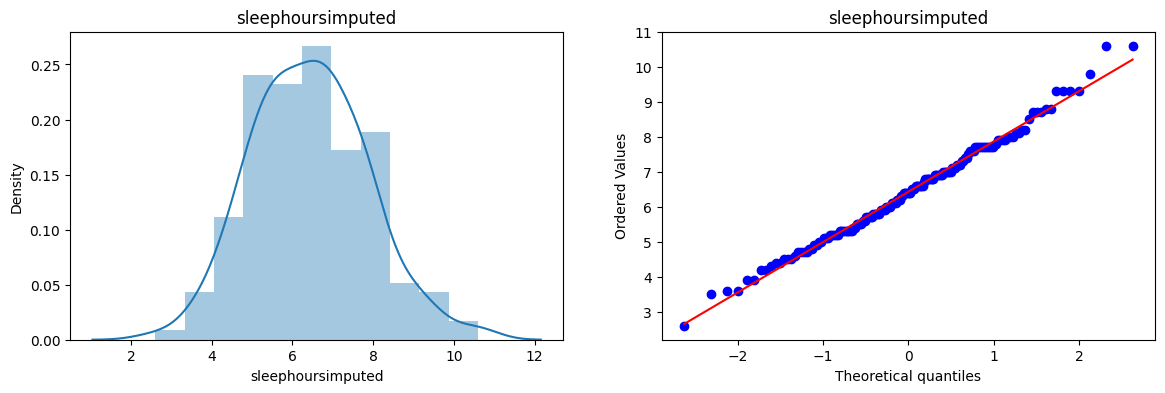

C:\Users\273309\AppData\Local\Temp\ipykernel_6256\3350185121.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrainm[col])


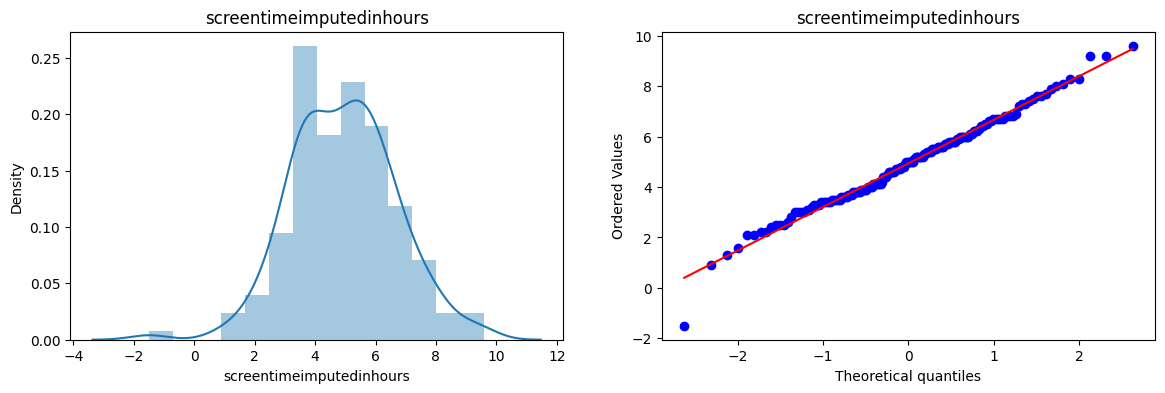

C:\Users\273309\AppData\Local\Temp\ipykernel_6256\3350185121.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrainm[col])


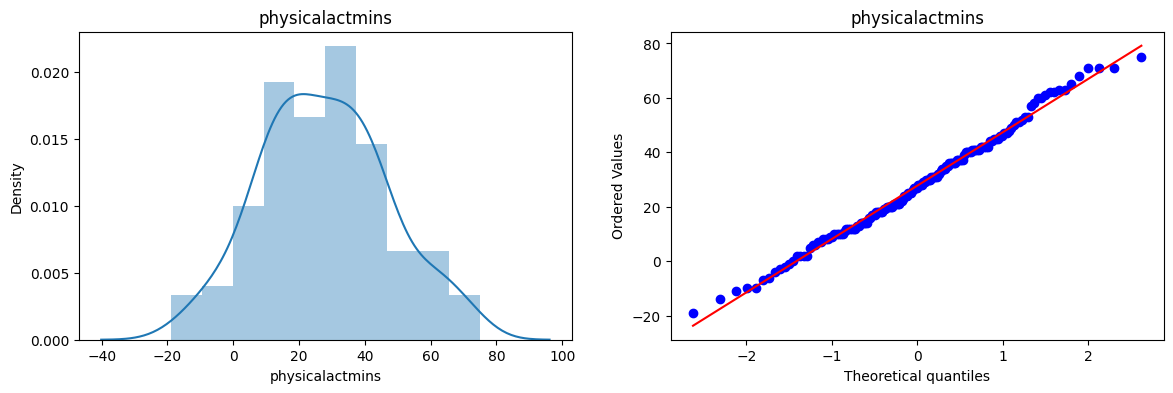

C:\Users\273309\AppData\Local\Temp\ipykernel_6256\3350185121.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrainm[col])


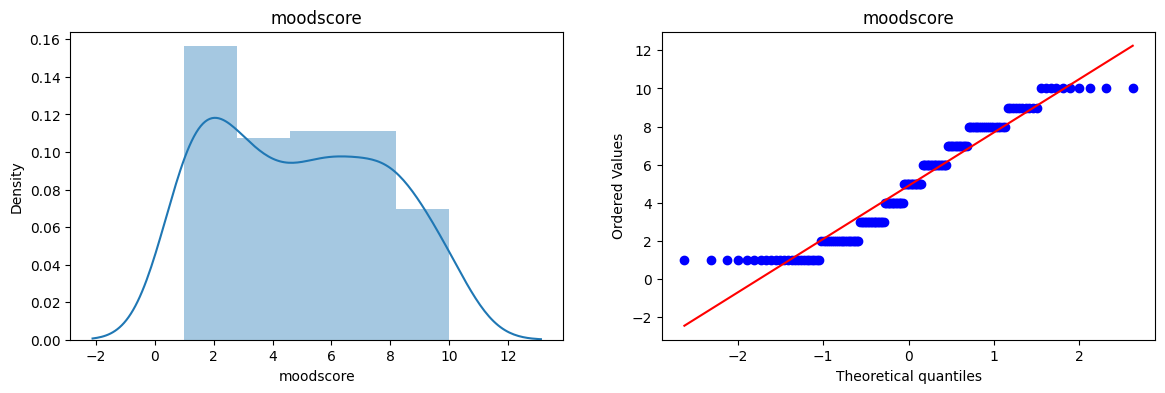

C:\Users\273309\AppData\Local\Temp\ipykernel_6256\3350185121.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrainm[col])


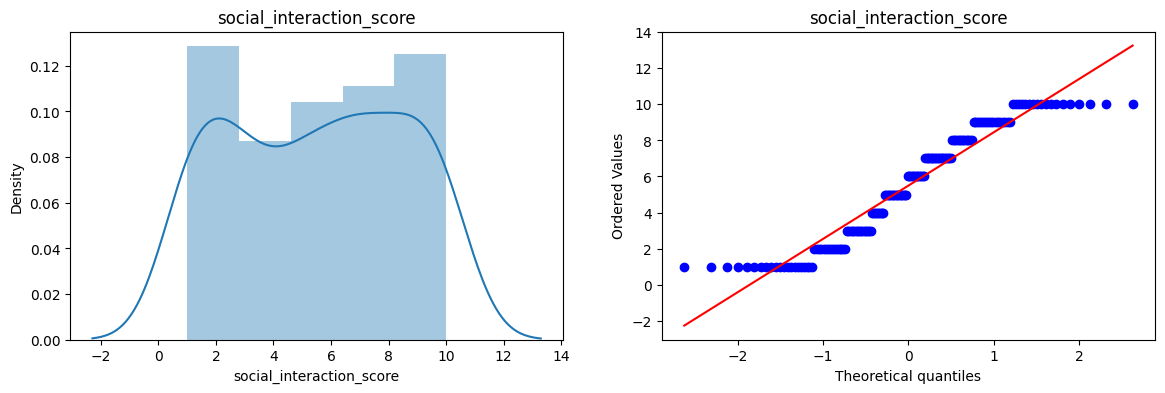

In [19]:
for col in ["sleephoursimputed","screentimeimputedinhours","physicalactmins","moodscore","social_interaction_score"]:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(xtrainm[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(xtrainm[col], dist="norm", plot=plt)

    plt.title(col)
    plt.plot()
    plt.show()
    

In [38]:
xtrainm["ratio"]=xtrainm["sleephoursimputed"]/xtrainm["screentimeimputedinhours"]
xtestm["ratio"]=xtestm["sleephoursimputed"]/xtestm["screentimeimputedinhours"]

In [39]:
xtrainm

,social_interaction_score,gender,student_type,sleep_quality,sleephoursimputed,screentimeimputedinhours,physicalactmins,moodscore,ratio
137,2,Other,School,Average,6.0,4.4,22.0,2.0,1.363636
163,2,Female,School,Poor,5.3,5.8,23.0,3.0,0.913793
111,9,Female,Working,Average,6.5,7.2,28.0,6.0,0.902778
123,6,Other,Working,Poor,4.4,9.2,41.0,10.0,0.478261
109,6,Female,College,Good,5.3,4.6,13.0,2.0,1.152174
...,...,...,...,...,...,...,...,...,...
43,3,Male,School,Good,6.0,6.7,2.0,6.0,0.895522
22,10,Female,School,Good,6.6,6.4,25.0,4.0,1.031250
72,9,Female,College,Poor,6.4,7.3,0.0,6.0,0.876712
15,9,Male,School,Good,5.7,3.4,36.0,1.0,1.676471


In [40]:
xtrainm=xtrainm.drop(columns=["sleephoursimputed","screentimeimputedinhours"])
xtestm=xtestm.drop(columns=["sleephoursimputed","screentimeimputedinhours"])

In [41]:
xtrainm

,social_interaction_score,gender,student_type,sleep_quality,physicalactmins,moodscore,ratio
137,2,Other,School,Average,22.0,2.0,1.363636
163,2,Female,School,Poor,23.0,3.0,0.913793
111,9,Female,Working,Average,28.0,6.0,0.902778
123,6,Other,Working,Poor,41.0,10.0,0.478261
109,6,Female,College,Good,13.0,2.0,1.152174
...,...,...,...,...,...,...,...
43,3,Male,School,Good,2.0,6.0,0.895522
22,10,Female,School,Good,25.0,4.0,1.031250
72,9,Female,College,Poor,0.0,6.0,0.876712
15,9,Male,School,Good,36.0,1.0,1.676471


In [55]:
preprocessor = ColumnTransformer([
    ("encoded_gender", OneHotEncoder(sparse_output=False), ["gender"]),
    ("encoded_student_type", OneHotEncoder(sparse_output=False), ["student_type"]),
    ("ordered_sleep_quality", OrdinalEncoder(categories=[["Poor", "Average", "Good"]]), ["sleep_quality"]),
    ("power_trans", PowerTransformer(method='yeo-johnson', standardize=True), ["social_interaction_score", "moodscore"]),

    ("minmax_scaled", MinMaxScaler(), ["ratio", "physicalactmins"])
])

le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
ytest=le.fit_transform(ytest)


E:\Users\273309\anaconda\envs\redcrow\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Users\273309\anaconda\envs\redcrow\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
pipe=Pipeline([("preprocessing",preprocessor),("model",LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=1000))])

In [57]:
pipe.fit(xtrainm,ytrain)

E:\Users\273309\anaconda\envs\redcrow\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encoded_gender', ...), ('encoded_student_type', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [63]:
p=pipe.predict(xtestm)
p

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [64]:
a=accuracy_score(p,ytest)
a

0.65

In [61]:
ytest

array([0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1])